<a href="https://colab.research.google.com/github/daniel-lorenzo/Termodinamica/blob/master/Pr%C3%A1ctica_8/P8_Ejercicio_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 5
Para el siguiente sistema y despreciando la variación de energía cinética y potencial, determinar:

a) $\Delta S_u$ (variación de entropía del universo)   
b) $W_{perd}$ (trabajo perdido)   
c) $\eta_{ex}$ (rendimiento exergético del proceso)

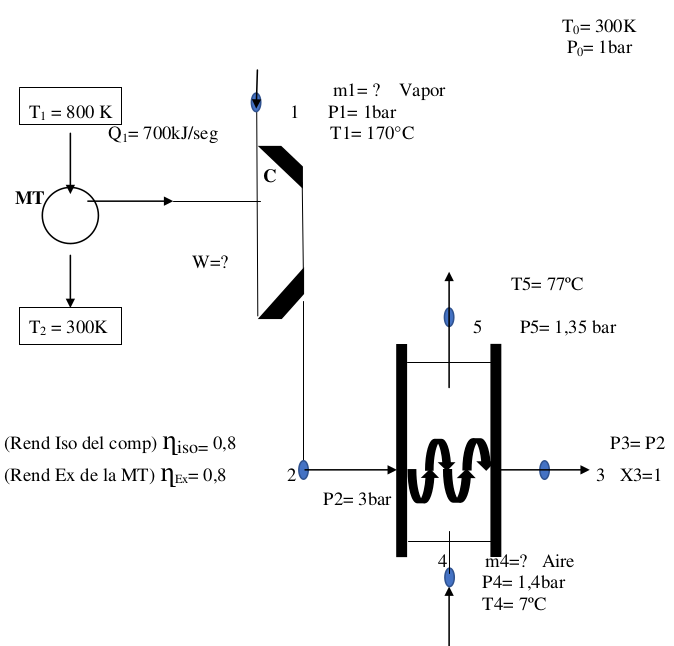

## Solución

In [1]:
# Datos:
T_0 = 300 # [K]
P_0 = 100 # [kPa]
T_f1 = 800 # [K]
T_f2 = 300 # [K]
Q_1 = 700 # [kJ/s]
P_1 = 100 # [kPa]
T_1 = 170 + 273 # [K]
P_3 = P_2 = 300 # [kPa]
x_3 = 1
P_4 = 140 # [kPa]
T_4 = 7 + 273 # [K]
T_5 = 77 + 273 # [K]
P_5 = 135 # [kPa]
η_iso = 0.8
η_exmt = 0.8
cp_aire = 1.0047 # [kJ/(kg·K)]
cv_aire = 0.7176 # [kJ/(kg·K)]
R_aire = 0.2870 # [kJ/(kg·K)]

---
### Máquina térmica

Variación de entropía fuente 1
$$\Delta S_1 = \frac{Q_1}{T_1}$$

Calor útil 1
$$Q_{u1} = Q_1 - T_0 \Delta S_1$$

Calor útil 2
$$Q_{u2} = 0$$

Rendimiento exergético máquina térmica
$$\eta_{ex,mt} = \frac{W_{mt}}{Q_{u1}}$$

Trabajo máquina térmica
$$W_{mt} = \eta_{ex,mt} Q_{u1}$$

$$W_{mt} = |Q_1| + |Q_2|$$

Despejamos $Q_2$
$$Q_2 = W_{mt} - |Q_1|$$

Variación de entropía fuente 2
$$\Delta S_2 = \frac{Q_2}{T_2}$$

In [2]:
# Variación de entropía fuente 1
ΔS_1 = Q_1/T_f1
# Calor útil 1
Q_u1 = Q_1 - T_0*ΔS_1
# Calor útil 2
Q_u2 = 0
# Rendimiento exergético máquina térmica
W_mt = η_exmt*Q_u1
# Calor 2
Q_2 = W_mt - Q_1
# Variación de entropía fuente 2
ΔS_2 = abs(Q_2)/T_f2

In [3]:
#@title Resultados
print("ΔS_1 = %.3f [kJ/K]"%ΔS_1)
print("Q_u1 = %.2f [kJ]"%Q_u1)
print("W_mt = %.1f [kJ]"%W_mt)
print("ΔS_2 = %.3f [kJ/K]"%ΔS_2)

ΔS_1 = 0.875 [kJ/K]
Q_u1 = 437.50 [kJ]
W_mt = 350.0 [kJ]
ΔS_2 = 1.167 [kJ/K]


---
### Compresor

In [4]:
!pip install CoolProp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 15.5 MB/s eta 0:00:00


In [5]:
import CoolProp.CoolProp as cp

$P_1, \; T_1 \qquad \rightarrow \qquad h_1, \; s_1$

$$s_{2rev} = s_1$$

$P_2, \; s_{2rev} \qquad \rightarrow \qquad h_{2rev}$

Rendimiento isoentrópico
$$\eta_{iso} = \frac{h_{2rev} - h_1}{h_2 - h_1}$$

Despejo $h_2$
$$h_2 = h_1 + \frac{h_{2rev} - h_1}{\eta_{iso}}$$

Trabajo en el compresor
$$W_c = m_1 (h_2 - h_1)$$

Despejamos $m_1$
$$m_1 = \frac{W_c}{h_2 - h_1}$$

$$m_3 = m_2 = m_1$$

In [6]:
h_1 = cp.PropsSI('H','P',P_1*1e3,'T',T_1,'Water')/1e3 # [kJ/kg]
s_1 = cp.PropsSI('S','P',P_1*1e3,'T',T_1,'Water')/1e3 # [kJ/(kg·K)]
s_2rev = s_1
h_2rev = cp.PropsSI('H','P',P_2*1e3,'S',s_2rev*1e3,'Water')/1e3

In [7]:
W_c = W_mt
h_2 = h_1 + (h_2rev - h_1)/η_iso
m_1 = W_c/(h_2 - h_1)

In [8]:
#@title Resultados
print("s_1 = %.4f [kJ/(kg·K)]"%s_1)
print("h_2rev = %.2f [kJ/kg]"%h_2rev)
print("h_2 = %.2f [kJ/kg]"%h_2)
print("\nm_1 = %.3f [kg/s]"%m_1)

s_1 = 7.7055 [kJ/(kg·K)]
h_2rev = 3070.62 [kJ/kg]
h_2 = 3134.30 [kJ/kg]

m_1 = 1.099 [kg/s]


---
### Intercambiador de calor

$P_3, \; x_3 \qquad \rightarrow \qquad h_3, \; s_3$

Primer principio termodinámica
$$Q - W = \Delta H$$

$Q = 0$   
$W = 0$

$$\Delta H = m_4 c_p (T_5 - T_4) + m_1 (h_2 - h_3) = 0$$

Despejo $m_4$
$$m_4 = \frac{m_1 (h_2 - h_3)}{c_p (T_5 - T_4)}$$

Variación de entropía 1-3
$$\Delta S_{13} = m_1 (s_3 - s_1)$$

Variación de entropía 4-5
$$\Delta S_{45} = m_4 \left( c_p \ln \frac{T_5}{T_4} - R \ln \frac{P_5}{P_4} \right)$$

Variación de entropía del universo

$$\Delta S_u = \Delta S_1 + \Delta S_2 + \Delta S_{13} + \Delta S_{45}$$

Variación de exergía 1-3

$$\Delta Ex_{13} = \Delta H_{13} - T_0 \Delta S_{13}$$

$$\Delta Ex_{13} = m_1 (h_3 - h_1) -T_0 \Delta S_{13}$$

Variación de exergía 4-5

$$\Delta Ex_{45} = m_4 c_p (T_5 - T_4) - T_0 \Delta S_{45}$$

Rendimiento exergético
$$\eta_{ex} = \frac{\Delta Ex_{13} + \Delta Ex_{45}}{Q_{u1}}$$

In [9]:
import numpy as np

In [10]:
h_3 = cp.PropsSI('H','P',P_3*1e3,'Q',x_3,'Water')/1e3
s_3 = cp.PropsSI('S','P',P_3*1e3,'Q',x_3,'Water')/1e3

m_4 = (m_1*(h_2 - h_3))/(cp_aire*(T_5 - T_4))

In [11]:
ΔS_13 = m_1*(s_3 - s_1)
ΔS_45 = m_4*(cp_aire*np.log(T_5/T_4 - R_aire*np.log(P_5/P_4)))
ΔS_u = (-ΔS_1) + ΔS_2 + ΔS_13 + ΔS_45

In [12]:
ΔEx_13 = m_1*(h_3 - h_1) - T_0*ΔS_13
ΔEx_45 = m_4*cp_aire*(T_5 - T_4) - T_0*ΔS_45

η_ex = (ΔEx_13 + ΔEx_45)/Q_u1

In [13]:
#@title Resultados:
print("h_3 = %.2f [kJ/kg]"%h_3)
print("s_3 = %.4f [kJ/(kg·K)]"%s_3)
print("m_4 = %.2f [kg/s]"%m_4)
print("ΔS_13 = %.4f [kJ/K]"%ΔS_13)
print("ΔS_45 = %.4f [kJ/K]"%ΔS_45)
print("\nη_ex = %.2f"%η_ex)

h_3 = 2724.88 [kJ/kg]
s_3 = 6.9916 [kJ/(kg·K)]
m_4 = 6.40 [kg/s]
ΔS_13 = -0.7848 [kJ/K]
ΔS_45 = 1.4881 [kJ/K]

η_ex = 0.32
